In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

In [4]:
cardata=pd.read_csv('/content/car data.csv')

In [5]:
cardata.shape

(301, 9)

In [6]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
cardata.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
cardata['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [11]:
cardata['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


In [12]:
cardata['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [13]:
cardata['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


Encoding catigorical data

In [14]:
#encoding
encode = LabelEncoder()

In [15]:
transmissions=encode.fit_transform(cardata.Transmission)
cardata['Transmission']=transmissions

In [16]:
fuel_type=encode.fit_transform(cardata.Fuel_Type)
cardata['Fuel_Type']=fuel_type

In [17]:
seller_type=encode.fit_transform(cardata.Seller_Type)
cardata['Seller_Type']=seller_type

In [18]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [19]:
x=cardata.drop(['Car_Name','Selling_Price'],axis=1)
y=cardata['Selling_Price']

In [20]:
print(x,y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


Fit the linear model

In [23]:
linearmodel = LinearRegression()

In [24]:
linearmodel.fit(x_train,y_train)

LinearRegression()

In [25]:
x_train_pred=linearmodel.predict(x_train)
x_train_accur=metrics.r2_score(x_train_pred,y_train)

In [26]:
print('the r2 score',x_train_accur)

the r2 score 0.8635655509198781


In [27]:
x_test_pred=linearmodel.predict(x_test)
x_test_accur=metrics.r2_score(x_test_pred,y_test)

In [28]:
print('the r2 score',x_test_accur)

the r2 score 0.8062199941176342


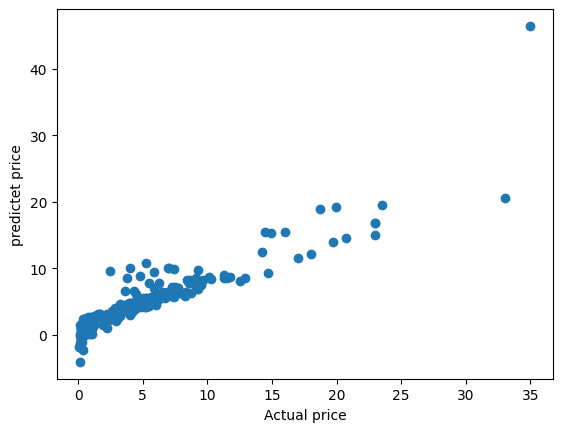

In [40]:
plt.scatter(y_train,x_train_pred)
plt.xlabel('Actual price')
plt.ylabel('predictet price')
plt.show()

fit lasso model

In [30]:
lassomodel=Lasso()

In [34]:
lassomodel.fit(x_train,y_train)

Lasso()

In [35]:
x_train_pred=lassomodel.predict(x_train)
x_train_accur=metrics.r2_score(x_train_pred,y_train)

In [36]:
print('the r2 score',x_train_accur)

the r2 score 0.798459024070425


In [37]:
x_test_pred=lassomodel.predict(x_test)
x_test_accur=metrics.r2_score(x_test_pred,y_test)

In [38]:
print('the r2 score',x_test_accur)

the r2 score 0.7711110403265475


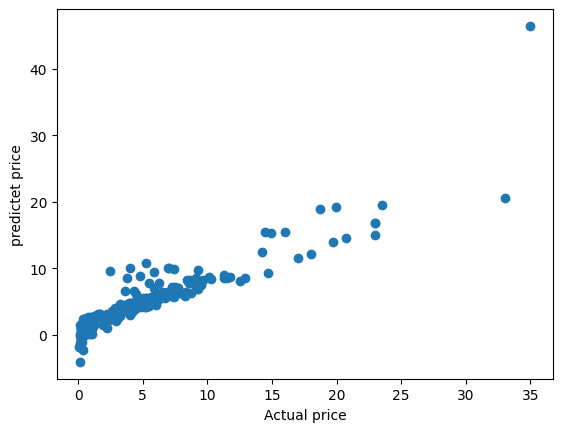

In [41]:
plt.scatter(y_train,x_train_pred)
plt.xlabel('Actual price')
plt.ylabel('predictet price')
plt.show()